# Figure 4: Global Quality over Parameter Sweep

The immediate application of EMBEDR is to assess the quality of embeddings that are generated at different hyperparameter values (`perplexity`, `n_neighbors`, etc.).  In the paper we demonstrate that this information can usefully be summarized as a series of box plots.  This type of figure has been incorporated into the EMBEDR code to facilitate analysis, as is shown in this notebook.

In [1]:
from EMBEDR import EMBEDR, EMBEDR_sweep
from EMBEDR.human_round import *
import EMBEDR.plots.EMBEDR_Figure_01v1_DimRed_Zoology as F01
import EMBEDR.plotting_utility as putl

import matplotlib
import matplotlib.gridspec as gs
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scanpy as sc
import seaborn as sns
from sklearn.metrics import pairwise_distances as pwd
import warnings

%matplotlib inline

warnings.filterwarnings("ignore", message="This figure includes Axes that")
warnings.filterwarnings("ignore", message="tight_layout not applied: ")

### Load the data and metadata

Here we load the Tabula Muris Marrow data set.  The data is stored as an `anndata` object, so we load it with the scanpy package.  The metadata are then stored as the `.obs` attribute.

In [4]:
# data = sc.read_h5ad("../../data/tabula-muris/04_facs_processed_data/FACS/Processed_Marrow.h5ad")
data = sc.read_h5ad("../../data/TabulaMuris/FACS/Processed_Marrow.h5ad")
# sc.tl.leiden(data)

X = data.obsm['X_pca'].astype(float).copy()
print(X.shape)

metadata = data.obs

del data

(5037, 50)


### Set runtime parameters here...

While many of these parameters can be ignored by users, we make them explicit here to show some of the options available when using EMBEDR.  Most important, however, is to give your project a **name** and a **directory** in which it can store intermediate results.  EMBEDR has been written to be efficient with memory and time, but for larger hyperparameter sweeps this can still result in saving dozens of files, so specifying this directory can help with project management down the road.

In this case, we want to sweep t-SNE's `perplexity` parameter, so we set `sweep_type = 'perplexity'`.  We can then indicate the values of perplexity that we want to use, or the `EMBEDR_sweep` object will initialize an array for you.  The `generate_rounded_log_arr` function generates an array of integers that are roughly log-spaced.  In the paper, we use 25 data embeddings and 10 null embeddings, but we find that results hold for as few as 3 data and 1 null embedding.  The EMBEDR infrastructure tries to save as much time as possible, so that once a large sweep (such as the one shown here) is completed, results are cached in the project directory for faster loading later.

In [5]:
sweep_type = 'perplexity'
perp_array = generate_rounded_log_arr(25, 10, len(X))[:-1]

n_data_embed = 25
n_null_embed = 10

n_jobs = -1

project_name = "TabulaMuris_Marrow_FACS_Sweep1"
project_dir = "/home/emj760/../../projects/b1042/ejohnson/projects/"

In [6]:
sweepObj = EMBEDR_sweep(sweep_type='perplexity',
                        n_jobs=n_jobs,
                        n_data_embed=n_data_embed,
                        n_null_embed=n_null_embed,
                        sweep_values=perp_array,
                        project_name=project_name,
                        project_dir=project_dir,
                        verbose=1)  ## Set verbose to zero to silence output!

sweepObj.fit(X)


Initializing EMBEDR hyperparameter sweep!

Sweeping over 22 values of the 'perplexity' parameter!

Fitting 'perplexity' sweep!

Fitting data with 'perplexity' = 3700 (1 / 22)


Initialized EMBEDR.tSNE_Embed object!

Generating null 1 / 10

Initialized EMBEDR.tSNE_Embed object!

Generating null 2 / 10

Initialized EMBEDR.tSNE_Embed object!

Generating null 3 / 10

Initialized EMBEDR.tSNE_Embed object!

Generating null 4 / 10

Initialized EMBEDR.tSNE_Embed object!

Generating null 5 / 10

Initialized EMBEDR.tSNE_Embed object!

Generating null 6 / 10

Initialized EMBEDR.tSNE_Embed object!

Generating null 7 / 10

Initialized EMBEDR.tSNE_Embed object!

Generating null 8 / 10

Initialized EMBEDR.tSNE_Embed object!

Generating null 9 / 10

Initialized EMBEDR.tSNE_Embed object!

Generating null 10 / 10

Initialized EMBEDR.tSNE_Embed object!

Fitting data with 'perplexity' = 2900 (2 / 22)


Initialized EMBEDR.tSNE_Embed object!

Generating null 1 / 10

Initialized EMBEDR.tSNE_Embed object!

G

### Plot the results!

The `EMBEDR_sweep` object will then automatically genereate the boxplots from Figure 4.  However, if we want, we can easily add a few example embeddings over the boxplots as well!

<AxesSubplot:xlabel='$k_{\\mathrm{Eff}}$'>

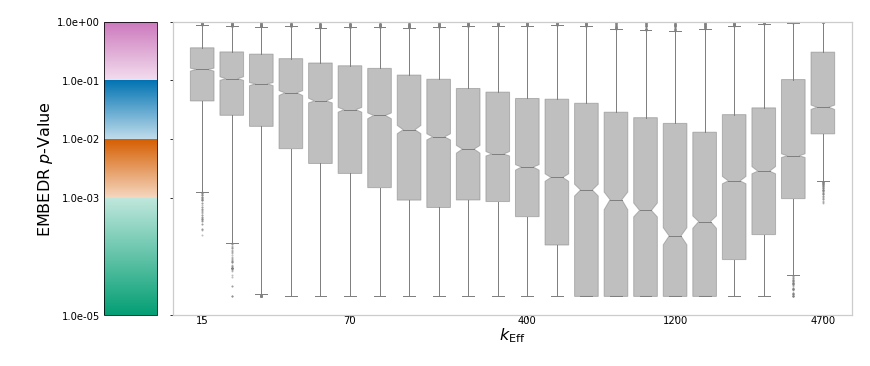

In [7]:
axis = sweepObj.sweep_boxplot()

NameError: name 'fig_dir' is not defined

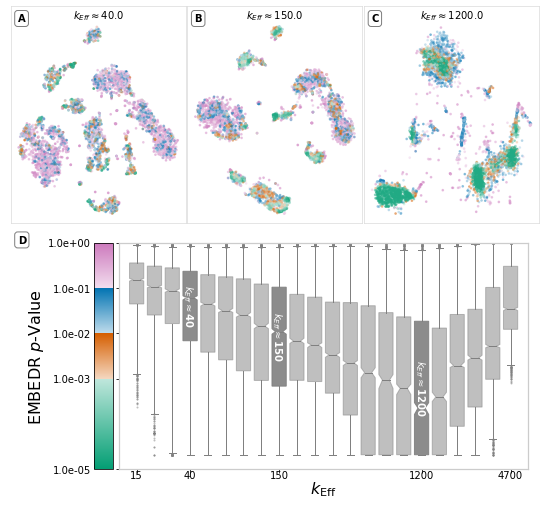

In [30]:
## Perplexities to display
perp_2_show = np.array([30, 100, 1000])

## Figure-level parameters
my_dpi   = 400
fig_wid  = 7.5  ## inches (8 inch-wide paper minus margins)
fig_hgt  = 1.0 * fig_wid
fig_size = (fig_wid, fig_hgt)
fig_pad  = 0.4
fig_ppad = 0.01  ## Percent of fig to leave around edge.
            
## Set gridspec parameters
main_hspace   = 0.02
main_hratios  = [1.0, 1.3]
top_wspace    = 0.01
bot_wpad       = 0.0
bot_hpad       = 0.0
bot_labelsize  = 16
bot_xlim       = [-1, sweepObj.n_sweep_values]

## Set the p-Value colorbar explicitly so that its consistent between panels.
pVal_cps  = [0, 1, 2, 3, 5]
pVal_cmap = putl.CategoricalFadingCMap(change_points=pVal_cps)

## Create the figure!
fig = plt.figure(figsize=fig_size)

## Set up top - bottom subplots
main_gs = fig.add_gridspec(2, 1,
                           hspace=main_hspace,
                           height_ratios=main_hratios)

## Set up top axes
top_behind_ax = fig.add_subplot(main_gs[0])
top_behind_ax = putl.make_border_axes(top_behind_ax,
                                      spine_alpha=0)

## Gridspec for select embeddings
top_gs = main_gs[0].subgridspec(nrows=1,
                                ncols=len(perp_2_show),
                                wspace=top_wspace)

## Axes for select embeddings
top_axes = []
for ii in range(len(perp_2_show)):
    ax = fig.add_subplot(top_gs[ii])
    
    top_axes.append(ax)

fig.tight_layout(pad=fig_pad)

## Add the boxplots to the bottom
bot_axis = sweepObj.sweep_boxplot(fig=fig,
                                  gridspec=main_gs,
                                  gridspec_idx=1,  ## Which gridspec to use to make subplots
                                  params_2_highlight=perp_2_show,
                                  pVal_cmap=pVal_cmap)

## Add text overlays on the highlighted perplexity values
tform = bot_axis.transAxes.inverted()
for pNo, perp in enumerate(sweepObj.sweep_values[::-1]):
    if perp not in perp_2_show:
        continue

    bX0, bY0, bdX, bdY = bot_axis.artists[pNo].get_window_extent().bounds
    tX = bX0 + (bdX / 2.) - 2
    tY = bY0 + (bdY / 2.)
    tX, tY = tform.transform([tX, tY])
    kE = int(human_round(sweepObj.kEff[perp]))
    bot_axis.text(tX, tY, r"$k_{Eff} \approx $" + f"{kE}",
                  va='center', ha='center', fontweight='bold',
                  color='w', rotation=-90, fontsize=10,
                  transform=bot_axis.transAxes)

for ii, perp in enumerate(perp_2_show):
    axis = top_axes[ii]
    _ = sweepObj.plot_embedding(param_2_plot=perp,
                                fig=fig,
                                axis=axis,
                                axis_kwds={'spine_alpha': 1,
                                           'spine_width':0.5},
                                cmap=pVal_cmap,
                                scatter_s=2,
                                scatter_alpha=0.4,
                                order='asc',
                                show_cbar=False,
                                cite_EMBEDR=False)
    
    ylim = axis.get_ylim()
    _ = axis.set_ylim(ylim[0], 1.1 * ylim[1])
    
    kE = human_round(sweepObj.kEff[perp])
    _ = axis.set_xlabel(r"$k_{Eff} \approx $" + f"{kE}", labelpad=-12)
    _ = axis.xaxis.set_label_position('top')
    
_ = putl.add_panel_number(top_axes[0], "A", edge_pad=7,
                          fontsize=10)
_ = putl.add_panel_number(top_axes[1], "B", edge_pad=7,
                          fontsize=10)
_ = putl.add_panel_number(top_axes[2], "C", edge_pad=7,
                          fontsize=10)

bot_behind_axis = putl.add_panel_number(fig.get_axes()[4], "D", edge_pad=7, fontsize=10)

fig_name = f"Figure_04v1_GlobalParameterSweep_" + project_name
putl.save_figure(fig, fig_name, fig_dir=fig_dir, formats=['pdf', 'tiff', 'png'], dpi=400)